In [2]:
setwd("/Users/yuqizhou/Downloads")

#function ct.letters for checking final assessment answers
#code adapted from https://www.geeksforgeeks.org/count-common-characters-in-two-strings/
ct.letters <- function(s1, s2){
  
  #Find length of each string
  n1 = nchar(s1)
  # print(paste("n1:",n1))
  n2 = nchar(s2)
  # print(paste("n2:",n2))
  
  #To store the frequencies of characters of string s1 and s2
  freq1 = rep(0,26)
  freq2 = rep(0,26)
  
  #To store the count of valid pairs
  count = 0
  
  #Update the frequencies of the characters of string s1
  for (i in 1:n1){
    freq1[utf8ToInt(substring(s1,i,i)) - utf8ToInt("a")+1] = freq1[utf8ToInt(substring(s1,i,i)) - utf8ToInt("a")+1] + 1
  }
  #Update the frequencies of the characters of string s2
  for (i in 1:n2){
    freq2[utf8ToInt(substring(s2,i,i)) - utf8ToInt("a")+1] = freq2[utf8ToInt(substring(s2,i,i)) - utf8ToInt("a")+1] + 1
  }
  
  # Find the count of valid pairs
  for (i in 1:26){
    count = count + (min(freq1[i], freq2[i]));
  }
  
  return(count)
}

#function findOutWorkerId for creating a vector of workerId that needs to be excluded
findOutWorkerId <- function(id.out){
  vec = c()
  for (i in id.out) {
    vec = append(i, vec)
  }
  return(vec)
}

library(tidyverse)


,StartDate,EndDate,Status,IPAddress,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientLastName,⋯,totalOffTask,totalOnTask,perPagePT,pageNo,workerId,hitId,assignmentId,timeRemaining,timeRemaining2,phase2.condition
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,⋯,totalOffTask,totalOnTask,perPagePT,pageNo,workerId,hitId,assignmentId,timeRemaining,timeRemaining2,phase2 condition
2,"{""ImportId"":""startDate"",""timeZone"":""America/Denver""}","{""ImportId"":""endDate"",""timeZone"":""America/Denver""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America/Denver""}","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",⋯,"{""ImportId"":""totalOffTask""}","{""ImportId"":""totalOnTask""}","{""ImportId"":""perPagePT""}","{""ImportId"":""pageNo""}","{""ImportId"":""workerId""}","{""ImportId"":""hitId""}","{""ImportId"":""assignmentId""}","{""ImportId"":""timeRemaining""}","{""ImportId"":""timeRemaining2""}","{""ImportId"":""phase2 condition""}"
3,2022-04-10 02:26:02,2022-04-10 02:40:01,IP Address,69.9.44.167,100,838,TRUE,2022-04-10 02:40:02,R_8qPMobMse6gvA0F,,⋯,-38,427,",61.424,-38.404,40.479, PAGE BREAK ,1.9, PAGE BREAK ,120.749, PAGE BREAK ,12.27, PAGE BREAK ,24.981, PAGE BREAK ,10.933, PAGE BREAK ,40.204, PAGE BREAK ,2.641, PAGE BREAK ,15.507, PAGE BREAK ,3.744, PAGE BREAK ,3.643, PAGE BREAK ,3.644, PAGE BREAK ,3.643, PAGE BREAK ,3.646, PAGE BREAK ,3.648, PAGE BREAK ,3.649, PAGE BREAK ,3.645, PAGE BREAK ,3.741, PAGE BREAK ,3.752, PAGE BREAK ,11.557, PAGE BREAK ,8.459, PAGE BREAK ,7.154, PAGE BREAK ,4.808, PAGE BREAK ,5.913, PAGE BREAK ,8.226, PAGE BREAK ,11.541, PAGE BREAK ,0.824, PAGE BREAK ,18.287, PAGE BREAK",55,A3V2TZ7MAD41L2,3J06WJ78IWQURAR477B0GZSJQMWVVG,3NG53N1RL5PMXYWP44XT7DFIBND8P1,0,0,restudy
4,2022-04-10 02:35:05,2022-04-10 02:47:37,IP Address,73.236.233.120,100,752,TRUE,2022-04-10 02:47:38,R_2xPLzSidUYOA3kK,,⋯,0,504,",111.09, PAGE BREAK ,2.262, PAGE BREAK ,120.674, PAGE BREAK ,4.141, PAGE BREAK ,17.703, PAGE BREAK ,12.634, PAGE BREAK ,33.608, PAGE BREAK ,11.1, PAGE BREAK ,2.49, PAGE BREAK ,12.643, PAGE BREAK ,12.652, PAGE BREAK ,12.757, PAGE BREAK ,12.655, PAGE BREAK ,12.761, PAGE BREAK ,12.656, PAGE BREAK ,12.655, PAGE BREAK ,12.659, PAGE BREAK ,11.652, PAGE BREAK ,12.658, PAGE BREAK ,12.179, PAGE BREAK ,5.028, PAGE BREAK ,6.83, PAGE BREAK ,19.898, PAGE BREAK ,11.361, PAGE BREAK ,4.768, PAGE BREAK ,5.967, PAGE BREAK ,2.32, PAGE BREAK ,9.925, PAGE BREAK",55,AKZ1KRMTFUPRB,3J06WJ78IWQURAR477B0GZSJQMWVVG,3VFJCI1K495M2QIM0UD64LWV0OERGS,0,0,test
5,2022-04-10 02:32:53,2022-04-10 02:48:07,IP Address,45.144.113.153,100,914,TRUE,2022-04-10 02:48:07,R_2YtCBhL6QFETINe,,⋯,0,294,",31.388, PAGE BREAK ,16.792, PAGE BREAK ,11.24, PAGE BREAK ,8.237, PAGE BREAK ,13.04, PAGE BREAK ,8.567, PAGE BREAK ,24.043, PAGE BREAK ,1.026, PAGE BREAK ,42.366, PAGE BREAK ,3.714, PAGE BREAK ,3.745, PAGE BREAK ,3.703, PAGE BREAK ,3.747, PAGE BREAK ,3.656, PAGE BREAK ,3.75, PAGE BREAK ,3.647, PAGE BREAK ,3.661, PAGE BREAK ,3.661, PAGE BREAK ,3.766, PAGE BREAK ,21.63, PAGE BREAK ,13.071, PAGE BREAK ,12.35, PAGE BREAK ,9.471, PAGE BREAK ,10.434, PAGE BREAK ,7.418, PAGE BREAK ,7.863, PAGE BREAK ,6.762, PAGE BREAK ,25.53, PAGE BREAK",56,A8V0L2YF8U6OX,3J06WJ78IWQURAR477B0GZSJQMWVVG,34T446B1CAKLLKII4VY8UYATT6MC04,0,0,GC
6,2022-04-10 02:34:19,2022-04-10 02:49:24,IP Address,75.165.156.187,100,905,TRUE,2022-04-10 02:49:24,R_5jT71WfzinjC1i1,,⋯,-46,362,",70.217, PAGE BREAK ,1.714, PAGE BREAK ,120.655, PAGE BREAK ,12.071, PAGE BREAK ,3.879,-6.492,-0.001,13.413, PAGE BREAK ,2.647,-4.049,0,5.761, PAGE BREAK ,3.69,-5.064,-0.001,7.165, PAGE BREAK ,4.755, PAGE BREAK ,25.049,-26.703

,StartDate,EndDate,Status,IPAddress,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientLastName,⋯,worktimeArray,offTask,onTask,totalOffTask,totalOnTask,perPagePT,pageNo,assignmentId,hitId,workerId
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,⋯,worktimeArray,offTask,onTask,totalOffTask,totalOnTask,perPagePT,pageNo,assignmentId,hitId,workerId
2,"{""ImportId"":""startDate"",""timeZone"":""America/Denver""}","{""ImportId"":""endDate"",""timeZone"":""America/Denver""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America/Denver""}","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",⋯,"{""ImportId"":""worktimeArray""}","{""ImportId"":""offTask""}","{""ImportId"":""onTask""}","{""ImportId"":""totalOffTask""}","{""ImportId"":""totalOnTask""}","{""ImportId"":""perPagePT""}","{""ImportId"":""pageNo""}","{""ImportId"":""assignmentId""}","{""ImportId"":""hitId""}","{""ImportId"":""workerId""}"
3,2022-04-11 01:06:51,2022-04-11 01:09:42,IP Address,72.181.6.17,100,171,TRUE,2022-04-11 01:09:42,R_27Wh3u8tJVs7LKz,,⋯,,,,,,,,,,
4,2022-04-11 01:10:15,2022-04-11 01:16:24,IP Address,68.203.204.48,100,368,TRUE,2022-04-11 01:16:25,R_87Cuf6n8JntGGNr,,⋯,,,,,,,,,,
5,2022-04-11 02:05:25,2022-04-11 02:17:07,IP Address,45.144.113.155,100,702,TRUE,2022-04-11 02:17:08,R_RfRo8LFmRRVOivn,,⋯,,,,,,,,,,
6,2022-04-11 06:34:55,2022-04-11 06:39:18,IP Address,107.12.252.83,100,263,TRUE,2022-04-11 06:39:19,R_2CZbjiZe0IhLU35,,⋯,,,,,,,,,,


[1] 14

[1] 11

[1] 10

[1] 1

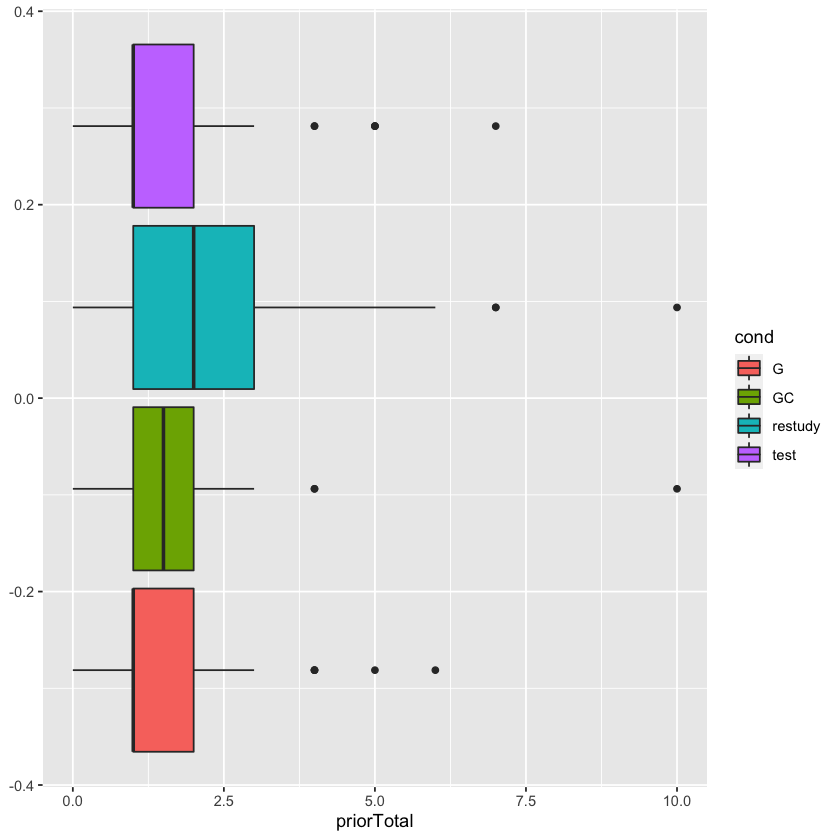

[1] 3

[1] 6

[1] 9

[1] 14

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


[1] 14

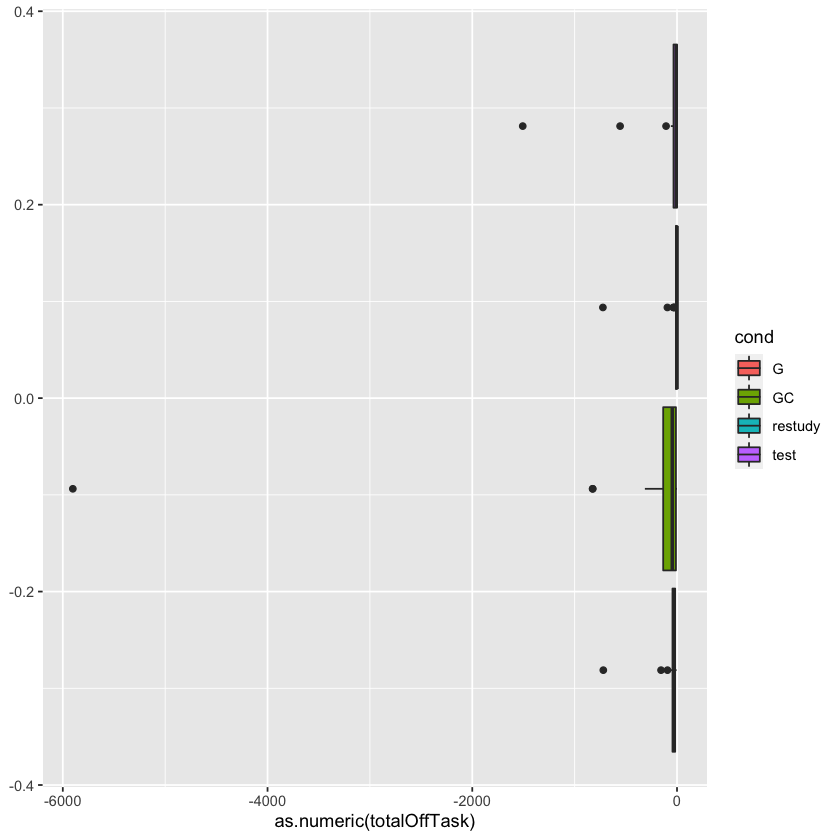

In [3]:
p1 = read.csv("Thesis+Project+II+v6.1_April+19,+2022_15.25.csv")
wid1 = p1$workerId[21:length(p1$workerId)]
t1 = p1$EndDate[21:length(p1$EndDate)]

p2 = read.csv("Part+2+Honors+Thesis+II+v6.1_April+19,+2022_15.14.csv")
wid2 = p2$Q27[16:length(p2$Q27)]
t2 = p2$EndDate[16:length(p2$EndDate)]

completed = intersect(wid1,wid2)

pt1 <- p1 %>% filter(workerId %in% completed) %>% select("EndDate","Q20","Q22","Q23","Q24",
                                                       "Q229", "Q228",	"Q235",	"Q234",	"Q232",	"Q233",	"Q230",	"Q231",	"Q236",	"Q237",	"Q238",	"Q239",	"Q240",	"Q241",	"Q242",	"Q243",	"Q244",	"Q245",	"Q246",	"Q247",	"Q273",	"Q274",	"Q280",	"Q275",
                                                       "Q28",	"Q30_1",	"Q32",	"Q33",	"Q281",	"Q34_1",	
                                                       "Q252",	"Q253",	"Q254",	"Q255",	"Q256",	"Q257",	"Q258",	"Q259",	"Q260",	"Q261",	"Q262",	"Q263",	"Q264",	"Q265",	"Q266",	"Q267",	"Q268",	"Q269",	"Q270",	"Q271",	"Q272",	"Q773",	"Q774",	"Q775",
                                                       "Q503",	"Q503",	"Q504",	"Q505","workerId","phase2.condition","totalOffTask")
pt2 <- p2 %>% select("StartDate", "Q5_3",	"Q5_7",	"Q5_8",	"Q5_9",	"Q5_10",	"Q5_12",	"Q5_13",	"Q5_14",	"Q5_15",	"Q5_19", 
                     "Q6_1",	"Q30", "Q30_1",	"Q8_1",	"Q10_1",	"Q13_1",	"Q14",	"Q14_1_TEXT",	"Q15",	"Q19_1",	"Q19_2",	"Q19_3",	"Q26",	"Q28",	"Q28_2_TEXT",	"Q20",	"Q27")
clean.df <- pt1 %>% left_join(pt2, by=c("workerId" = "Q27"))
colnames(clean.df) <- c("pt1Time",	"gender",	"ethnicity",	"edu",	"major",
                        "pt1_m1",	"pt1_m2",	"pt1_m3",	"pt1_m4",	"pt1_m5",	"pt1_m6",	"pt1_m7",	"pt1_m8",	"pt1_m9",	"pt1_m10",	"pt1_m11",	"pt1_m12",	"pt1_m13",	"pt1_m14",	"pt1_m15",	"pt1_m16",	"pt1_m17",	"pt1_m18",	"pt1_m19",	"pt1_m20",	"pt1_m21",	"pt1_m22",	"pt1_m23",	"pt1_m24",
                        "priorKnow",	"diff_material",	"GCLookup",	"GCother",	"GCsidebyside",	"finalScorePredict",
                        "pt2_m1",	"pt2_m2",	"pt2_m3",	"pt2_m4",	"pt2_m5",	"pt2_m6",	"pt2_m7",	"pt2_m8",	"pt2_m9",	"pt2_m10",	"pt2_m11",	"pt2_m12",	"pt2_m13",	"pt2_m14",	"pt2_m15",	"pt2_m16",	"pt2_m17",	"pt2_m18",	"pt2_m19",	"pt2_m20",	"pt2_m21",	"pt2_m22",	"pt2_m23",	"pt2_m24",
                        "GLookup",	"Gother",	"Gsidebyside",	"workerId",	"cond",	"totalOffTask",
                        "pt2Time",	"a1",	"a2",	"a3",	"a4",	"a5",	"a6",	"a7",	"a8",	"a9",	"a10",	
                        "diff_test",	"known","known_coded",	"LearningStyle",	"opinion_on_testlearning",	"openBookExam",	
                        "Gdefault",	"searchEngine",	"times_searchEngine","phone",	"computer",	"tablet",	"externalAid",	"studyDuringDelay",	"studyDuringDelay_explain",	"comments")

clean.df %>% select("workerId","pt1Time","pt2Time") %>% write.csv("timeCheckFinal.csv")
outOfTime = c("A1U8VXESVQPZFJ","AZXBVNZF65D8K","A207MWA5U0GWA5","A3Z014JO91RTM","AIEGKVQ47B3FQ","A1AAF0T0XWYZ94","ARQ7R97434PM2","A2M6585G92WX9A","A1XDYW4D4B610Z","AFVY38VJYS1ET","AEH29A6H16ANF","A351P2O6QGTCS")
clean.df = clean.df %>% filter(!(workerId %in% outOfTime))

clean.df = clean.df %>% mutate(a1=tolower(a1),
                               a2=tolower(a2),
                               a3=tolower(a3),
                               a4=tolower(a4),
                               a5=tolower(a5),
                               a6=tolower(a6),
                               a7=tolower(a7),
                               a8=tolower(a8),
                               a9=tolower(a9),	
                               a10=tolower(a10)) 

answers = c(clean.df$a1,clean.df$a2,clean.df$a3,clean.df$a4,clean.df$a5,clean.df$a6,clean.df$a7,clean.df$a8,clean.df$a9,clean.df$a10)
materials = c("studebaker",	"bernoulli’s",	"camelopard",	"contrapposto",	"gymnosperms",	"thalassemia",	"gum",	"hovercraft",	"ellipsoidal",	"eukaryotes")
correctCharNum = nchar(materials)
lt.counts = c(clean.df$a1.c,clean.df$a2.c,clean.df$a3.c,clean.df$a4.c,clean.df$a5.c,clean.df$a6.c,clean.df$a7.c,clean.df$a8.c,clean.df$a9.c,clean.df$a10.c)

n = length(clean.df$workerId)

#checking how many of the participants' answers' letters match the materials' letters
for (j in 1:10){
  for (i in 1:n){
    lt.counts[n*(j-1)+i] = ct.letters(answers[n*(j-1)+i],materials[j])
  }
}
clean.df = clean.df %>% mutate(a1.c=0,
                               a2.c=0,
                               a3.c=0,
                               a4.c=0,
                               a5.c=0,
                               a6.c=0,
                               a7.c=0,
                               a8.c=0,
                               a9.c=0,	
                               a10.c=0)

clean.df = clean.df %>% mutate(a1.c=lt.counts[1:n],
                               a2.c=lt.counts[(n+1):(2*n)],
                               a3.c=lt.counts[(2*n+1):(3*n)],
                               a4.c=lt.counts[(3*n+1):(4*n)],
                               a5.c=lt.counts[(4*n+1):(5*n)],
                               a6.c=lt.counts[(5*n+1):(6*n)],
                               a7.c=lt.counts[(6*n+1):(7*n)],
                               a8.c=lt.counts[(7*n+1):(8*n)],
                               a9.c=lt.counts[(8*n+1):(9*n)],	
                               a10.c=lt.counts[(9*n+1):(10*n)])

clean.df = clean.df %>% mutate(a1.rs = ifelse(a1.c==correctCharNum[1],1,ifelse(a1.c>correctCharNum[1]/2, 0.5, 0))) %>% 
  mutate(a2.rs = ifelse(a2.c==correctCharNum[2],1,ifelse(a2.c>correctCharNum[2]/2, 0.5, 0))) %>% 
  mutate(a3.rs = ifelse(a3.c==correctCharNum[3],1,ifelse(a3.c>correctCharNum[3]/2, 0.5, 0))) %>% 
  mutate(a4.rs = ifelse(a4.c==correctCharNum[4],1,ifelse(a4.c>correctCharNum[4]/2, 0.5, 0))) %>%
  mutate(a5.rs = ifelse(a5.c==correctCharNum[5],1,ifelse(a5.c>correctCharNum[5]/2, 0.5, 0))) %>% 
  mutate(a6.rs = ifelse(a6.c==correctCharNum[6],1,ifelse(a6.c>correctCharNum[6]/2, 0.5, 0))) %>% 
  mutate(a7.rs = ifelse(a7.c==correctCharNum[7],1,ifelse(a2.c>correctCharNum[7]/2, 0.5, 0))) %>% 
  mutate(a8.rs = ifelse(a8.c==correctCharNum[8],1,ifelse(a2.c>correctCharNum[8]/2, 0.5, 0))) %>% 
  mutate(a9.rs = ifelse(a9.c==correctCharNum[9],1,ifelse(a2.c>correctCharNum[9]/2, 0.5, 0))) %>% 
  mutate(a10.rs = ifelse(a10.c==correctCharNum[10],1,ifelse(a10.c>correctCharNum[10]/2, 0.5, 0)))

clean.df = clean.df %>% mutate(raw.fscore = a1.rs+a2.rs+a3.rs+a4.rs+a5.rs+a6.rs+a7.rs+a8.rs+a9.rs+a10.rs) 

known.coding = c(10,9,22,20,7,18,15,21,23,6)

clean.df = clean.df %>% mutate(a1.o=0,
                               a2.o=0,
                               a3.o=0,
                               a4.o=0,
                               a5.o=0,
                               a6.o=0,
                               a7.o=0,
                               a8.o=0,
                               a9.o=0,	
                               a10.o=0)

out.indicators = c(clean.df$a1.o,clean.df$a2.o,clean.df$a3.o,clean.df$a4.o,clean.df$a5.o,clean.df$a6.o,clean.df$a7.o,clean.df$a8.o,clean.df$a9.o,clean.df$a10.o)
knowTooMuch = c()

for(i in 1:length(clean.df$known_coded)){ 
  knownOnes = as.numeric(unlist(str_split(clean.df$known_coded[i], ",")))
  out.index = which(known.coding %in% knownOnes )
  if(length(out.index)>4) {
    knowTooMuch = append(knowTooMuch, clean.df$workerId[i])
  }
  for (j in out.index){
    out.indicators[(j-1)*n+i] = 1
  }
}

clean.df = clean.df %>% mutate(a1.o=out.indicators[1:n],
                               a2.o=out.indicators[(n+1):(2*n)],
                               a3.o=out.indicators[(2*n+1):(3*n)],
                               a4.o=out.indicators[(3*n+1):(4*n)],
                               a5.o=out.indicators[(4*n+1):(5*n)],
                               a6.o=out.indicators[(5*n+1):(6*n)],
                               a7.o=out.indicators[(6*n+1):(7*n)],
                               a8.o=out.indicators[(7*n+1):(8*n)],
                               a9.o=out.indicators[(8*n+1):(9*n)],	
                               a10.o=out.indicators[(9*n+1):(10*n)])

clean.df = clean.df %>% mutate(a1.s = ifelse(a1.o==1,0,a1.rs)) %>% 
  mutate(a2.s = ifelse(a2.o>0, 0 ,a2.rs)) %>% 
  mutate(a3.s = ifelse(a3.o>0, 0 ,a3.rs)) %>% 
  mutate(a4.s = ifelse(a4.o>0, 0 ,a4.rs)) %>%
  mutate(a5.s = ifelse(a5.o>0, 0 ,a5.rs)) %>% 
  mutate(a6.s = ifelse(a6.o>0, 0 ,a6.rs)) %>% 
  mutate(a7.s = ifelse(a7.o>0, 0 ,a7.rs)) %>% 
  mutate(a8.s = ifelse(a8.o>0, 0 ,a8.rs)) %>% 
  mutate(a9.s = ifelse(a9.o>0, 0 ,a9.rs)) %>% 
  mutate(a10.s = ifelse(a10.o>0, 0 ,a10.rs))

"/" <- function(x,y) ifelse(y==0,0,base:::"/"(x,y))

clean.df = clean.df %>% mutate(fscore = a1.s+a2.s+a3.s+a4.s+a5.s+a6.s+a7.s+a8.s+a9.s+a10.s, 
                               adjustedTotal = 10-(a1.o+a2.o+a3.o+a4.o+a5.o+a6.o+a7.o+a8.o+a9.o+a10.o),
                               priorTotal = a1.o+a2.o+a3.o+a4.o+a5.o+a6.o+a7.o+a8.o+a9.o+a10.o,
                               acc = fscore/adjustedTotal) 
clean.df %>% ggplot(aes(x=priorTotal, fill=cond)) + geom_boxplot()

#exclude participants with too much prior knowledge
clean.df = clean.df %>% filter(!(workerId %in% knowTooMuch))
length(knowTooMuch) #14

#exclude G/GC participants whose answer are not >7
notEnoughLookupG = c()
notEnoughLookupGC = c()

Gcond = clean.df %>% filter(cond == "G")
GCcond = clean.df %>% filter(cond == "GC") 
G.out = Gcond %>%filter(as.numeric(GLookup) <= 7) %>% select(workerId)
GC.out = GCcond %>% filter(as.numeric(GCLookup) <= 7) %>% select(workerId)
for (i in G.out) {
  notEnoughLookupG = append(i, notEnoughLookupG)
}

for (i in GC.out) {
  notEnoughLookupGC = append(i, notEnoughLookupGC)
}

clean.df = clean.df %>% filter(!(workerId %in% notEnoughLookupG)) %>% filter(!(workerId %in% notEnoughLookupGC))
length(notEnoughLookupG) #11
length(notEnoughLookupGC) #10

#exclude used external aid
aided = c()
aid.out = clean.df %>% filter(externalAid == "Yes") %>% select(workerId)
for (i in aid.out) {
  aided = append(i, aided)
}
clean.df = clean.df %>% filter(!(workerId %in% aided))
length(aided) #1

#exclude outlier offTask time
ggplot(clean.df, aes(x=as.numeric(totalOffTask), fill = cond)) + geom_boxplot()
Gcond = clean.df %>% filter(cond == "G")
GCcond = clean.df %>% filter(cond == "GC")
Tcond = clean.df %>% filter(cond == "test")
Rcond = clean.df %>% filter(cond == "restudy")

GoffTask.out = boxplot.stats(as.numeric(Gcond$totalOffTask))$out
GCoffTask.out = boxplot.stats(as.numeric(GCcond$totalOffTask))$out
ToffTask.out = boxplot.stats(as.numeric(Tcond$totalOffTask))$out
RoffTask.out = boxplot.stats(as.numeric(Rcond$totalOffTask))$out

off.g = Gcond %>% filter(as.numeric(totalOffTask) %in% GoffTask.out) %>% select(workerId)
off.gc = GCcond %>% filter(as.numeric(totalOffTask) %in% GCoffTask.out) %>% select(workerId)
off.t = Tcond %>% filter(as.numeric(totalOffTask) %in% ToffTask.out) %>% select(workerId)
off.r = Rcond %>% filter(as.numeric(totalOffTask) %in% RoffTask.out) %>% select(workerId)

outliers = findOutWorkerId(off.g)
length(outliers) #3
outliers = append(outliers, findOutWorkerId(off.gc))
length(outliers) #3
outliers = append(outliers, findOutWorkerId(off.t))
length(outliers) #3
outliers = append(outliers, findOutWorkerId(off.r))
length(outliers) #5

clean.df = clean.df %>% filter(!(workerId %in% outliers)) %>% 
  mutate_at(c("finalScorePredict","diff_material", "times_searchEngine",
              "phone", "computer", "tablet", 
              "pt2_m1",	"pt2_m2",	"pt2_m3",	"pt2_m4",	"pt2_m5",	"pt2_m6",	"pt2_m7",	"pt2_m8",	"pt2_m9",	"pt2_m10",	"pt2_m11",	"pt2_m12",	"pt2_m13",	"pt2_m14",	"pt2_m15",	"pt2_m16",	"pt2_m17",	"pt2_m18",	"pt2_m19",	"pt2_m20",	"pt2_m21",	"pt2_m22",	"pt2_m23",	"pt2_m24",
              "pt1_m1",	"pt1_m2",	"pt1_m3",	"pt1_m4",	"pt1_m5",	"pt1_m6",	"pt1_m7",	"pt1_m8",	"pt1_m9",	"pt1_m10",	"pt1_m11",	"pt1_m12",	"pt1_m13",	"pt1_m14",	"pt1_m15",	"pt1_m16",	"pt1_m17",	"pt1_m18",	"pt1_m19",	"pt1_m20",	"pt1_m21",	"pt1_m22",	"pt1_m23",	"pt1_m24"),
            as.numeric)

clean.df$times_searchEngine[is.na(clean.df$times_searchEngine)] <- 7.5
length(outliers) #14

#add var for sum of math questions answered for each part
clean.df = mutate(clean.df, pt1A = rowSums(!is.na(select(clean.df, c("pt1_m1",	"pt1_m2",	"pt1_m3",	"pt1_m4",	"pt1_m5",	"pt1_m6",	"pt1_m7",	"pt1_m8",	"pt1_m9",	"pt1_m10",	"pt1_m11",	"pt1_m12",	"pt1_m13",	"pt1_m14",	"pt1_m15",	"pt1_m16",	"pt1_m17",	"pt1_m18",	"pt1_m19",	"pt1_m20",	"pt1_m21",	"pt1_m22",	"pt1_m23",	"pt1_m24")))))
clean.df = mutate(clean.df, pt2A = rowSums(!is.na(select(clean.df, c("pt2_m1",	"pt2_m2",	"pt2_m3",	"pt2_m4",	"pt2_m5",	"pt2_m6",	"pt2_m7",	"pt2_m8",	"pt2_m9",	"pt2_m10",	"pt2_m11",	"pt2_m12",	"pt2_m13",	"pt2_m14",	"pt2_m15",	"pt2_m16",	"pt2_m17",	"pt2_m18",	"pt2_m19",	"pt2_m20",	"pt2_m21",	"pt2_m22",	"pt2_m23",	"pt2_m24")))))

write.csv(clean.df, "cleanreadyforA.csv")

            Df Sum Sq Mean Sq F value Pr(>F)
cond         3  0.053 0.01765   0.278  0.841
Residuals   99  6.280 0.06344               

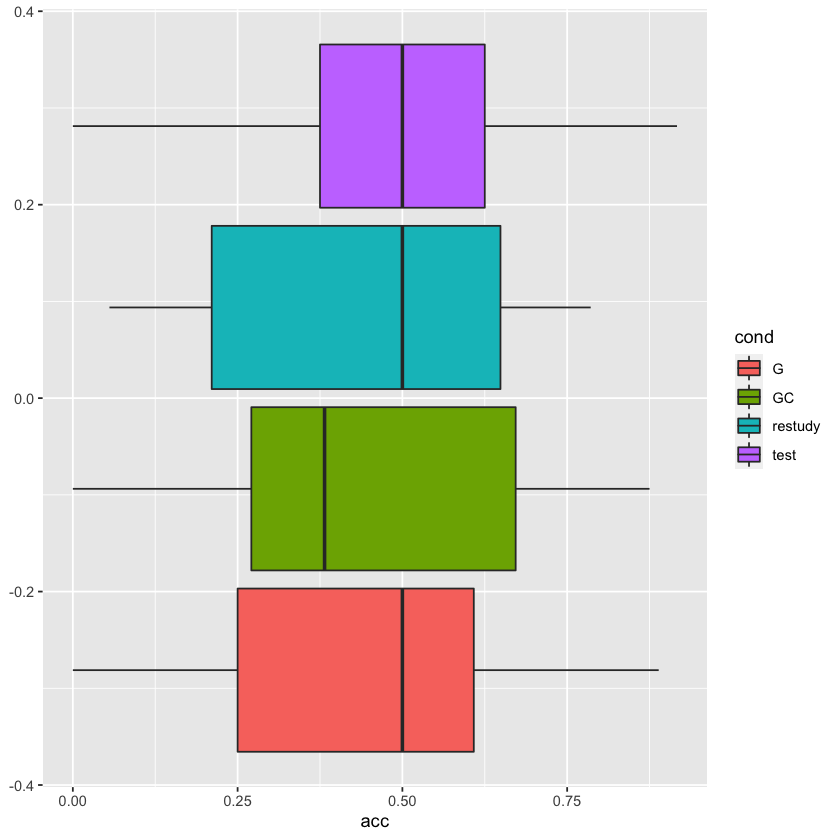


	Welch Two Sample t-test

data:  Googlecond$acc and Rcond$acc
t = -0.062415, df = 62.741, p-value = 0.9504
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1254151  0.1178187
sample estimates:
mean of x mean of y 
0.4372024 0.4410006 



	Welch Two Sample t-test

data:  Tcond$acc and Googlecond$acc
t = 0.85216, df = 71.758, p-value = 0.397
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06696042  0.16694238
sample estimates:
mean of x mean of y 
0.4871934 0.4372024 


[1] 0.267855

[1] 0.2363452

[1] 0.2391579


	Welch Two Sample t-test

data:  Gcond$acc and RESTcond$acc
t = -0.3476, df = 31.613, p-value = 0.7304
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1494922  0.1059265
sample estimates:
mean of x mean of y 
0.4371212 0.4589041 


[1] 0.2644008

[1] 0.2463925


	Welch Two Sample t-test

data:  Googlecond$acc and Restcond$acc
t = -0.56143, df = 81.032, p-value = 0.5761
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.13081031  0.07323484
sample estimates:
mean of x mean of y 
0.4372024 0.4659901 


[1] 0.267855

[1] 0.2370234


	Welch Two Sample t-test

data:  Tcond$acc and noTcond$acc
t = 0.68157, df = 56.004, p-value = 0.4983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06387947  0.12976334
sample estimates:
mean of x mean of y 
0.4871934 0.4542514 


[1] 0.2391579

[1] 0.2491754

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


cond,pt1Time,gender,ethnicity,edu,major,pt1_m1,pt1_m2,pt1_m3,pt1_m4,⋯,a9.s,a10.s,fscore,adjustedTotal,priorTotal,acc,pt1A,pt2A,is.outlier,is.extreme
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


cond,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
G,acc,0.9407575,0.20517580
GC,acc,0.9481221,0.33948297
restudy,acc,0.9302665,0.06261155
test,acc,0.9492735,0.12669528


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
3,99,0.3331964,0.801355



	Two Sample t-test

data:  Gcond$acc and GCcond$acc
t = -0.0020345, df = 40, p-value = 0.9984
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1695038  0.1691629
sample estimates:
mean of x mean of y 
0.4371212 0.4372917 



	Two Sample t-test

data:  Gcond$acc and Tcond$acc
t = -0.72924, df = 53, p-value = 0.4691
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.18779295  0.08764865
sample estimates:
mean of x mean of y 
0.4371212 0.4871934 



	Two Sample t-test

data:  Gcond$acc and Rcond$acc
t = -0.054683, df = 48, p-value = 0.9566
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1465198  0.1387611
sample estimates:
mean of x mean of y 
0.4371212 0.4410006 



	Two Sample t-test

data:  GCcond$acc and Tcond$acc
t = -0.69187, df = 51, p-value = 0.4922
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19469979  0.09489639
sample estimates:
mean of x mean of y 
0.4372917 0.4871934 



	Two Sample t-test

data:  GCcond$acc and Rcond$acc
t = -0.049758, df = 46, p-value = 0.9605
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1537475  0.1463297
sample estimates:
mean of x mean of y 
0.4372917 0.4410006 



	Two Sample t-test

data:  Tcond$acc and Rcond$acc
t = 0.75578, df = 59, p-value = 0.4528
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0761064  0.1684920
sample estimates:
mean of x mean of y 
0.4871934 0.4410006 



Call:
lm(formula = acc ~ cond, data = clean.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48719 -0.17340  0.01281  0.17399  0.45177 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.4371212  0.0536974   8.140  1.2e-12 ***
condGC      0.0001705  0.0778150   0.002    0.998    
condrestudy 0.0038794  0.0717562   0.054    0.957    
condtest    0.0500722  0.0693231   0.722    0.472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2519 on 99 degrees of freedom
Multiple R-squared:  0.008359,	Adjusted R-squared:  -0.02169 
F-statistic: 0.2782 on 3 and 99 DF,  p-value: 0.841



Call:
lm(formula = acc ~ cond + gender + ethnicity + edu + LearningStyle + 
    openBookExam + Gdefault + times_searchEngine + phone + computer + 
    tablet + pt1A + pt2A, data = clean.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4879 -0.1580  0.0000  0.1495  0.4703 

Coefficients:
                                                                 Estimate
(Intercept)                                                     0.0583468
condGC                                                          0.0367577
condrestudy                                                     0.0017228
condtest                                                        0.0901139
genderMale                                                     -0.1048137
genderNon-binary / third gender                                -0.0399230
ethnicityBlack or African American                              0.2620647
ethnicityHispanic or Latino                                     0.1831506
ethnicityOther                    

Subset selection object
Call: regsubsets.formula(acc ~ ., select(clean.df, c(acc, cond, gender, 
    ethnicity, edu, LearningStyle, openBookExam, Gdefault, times_searchEngine, 
    phone, computer, tablet, pt1A, pt2A)), nvmax = 19)
39 Variables  (and intercept)
                                                               Forced in
condGC                                                             FALSE
condrestudy                                                        FALSE
condtest                                                           FALSE
genderMale                                                         FALSE
genderNon-binary / third gender                                    FALSE
ethnicityBlack or African American                                 FALSE
ethnicityHispanic or Latino                                        FALSE
ethnicityOther                                                     FALSE
ethnicityWhite                                                     FALSE
eduBache

gender,n
<chr>,<int>
Female,55
Male,46
Non-binary / third gender,2


ethnicity,n
<chr>,<int>
Asian / Pacific Islander,12
Black or African American,5
Hispanic or Latino,6
Other,2
White,78


cond,mn.scorePredict
<chr>,<dbl>
G,5.272727
GC,5.050000
restudy,5.321429
test,3.848485


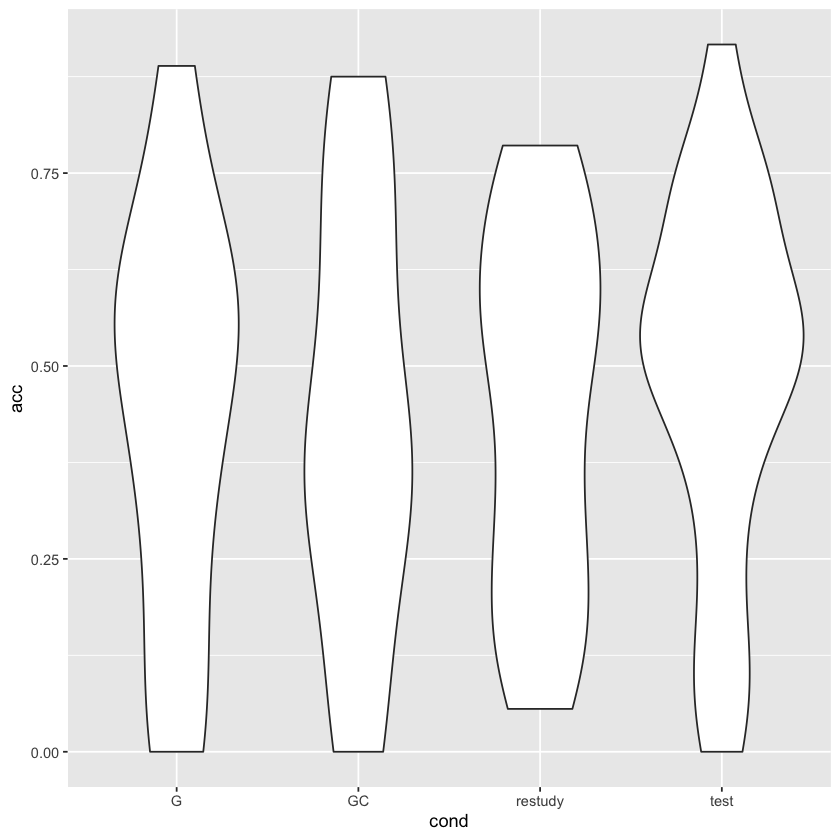


	Welch Two Sample t-test

data:  Gcond$finalScorePredict and GCcond$finalScorePredict
t = 0.26035, df = 39.399, p-value = 0.7959
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.507099  1.952553
sample estimates:
mean of x mean of y 
 5.272727  5.050000 



	Welch Two Sample t-test

data:  Gcond$finalScorePredict and Tcond$finalScorePredict
t = 1.8131, df = 38.543, p-value = 0.07762
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1652842  3.0137690
sample estimates:
mean of x mean of y 
 5.272727  3.848485 



	Welch Two Sample t-test

data:  Gcond$finalScorePredict and Rcond$finalScorePredict
t = -0.061331, df = 38.686, p-value = 0.9514
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.655291  1.557889
sample estimates:
mean of x mean of y 
 5.272727  5.321429 



	Welch Two Sample t-test

data:  GCcond$finalScorePredict and Tcond$finalScorePredict
t = 1.716, df = 40.613, p-value = 0.09377
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.212904  2.615934
sample estimates:
mean of x mean of y 
 5.050000  3.848485 



	Welch Two Sample t-test

data:  GCcond$finalScorePredict and Rcond$finalScorePredict
t = -0.38245, df = 40.174, p-value = 0.7041
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.705629  1.162772
sample estimates:
mean of x mean of y 
 5.050000  5.321429 



	Welch Two Sample t-test

data:  Tcond$finalScorePredict and Rcond$finalScorePredict
t = -2.3618, df = 58.165, p-value = 0.02155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.7212236 -0.2246638
sample estimates:
mean of x mean of y 
 3.848485  5.321429 


[1] 2.488991

[1] 2.37352

[1] 3.073416

[1] 2.459675

cond,mn.difLevel
<chr>,<dbl>
G,6.772727
GC,6.800000
restudy,6.357143
test,7.696970


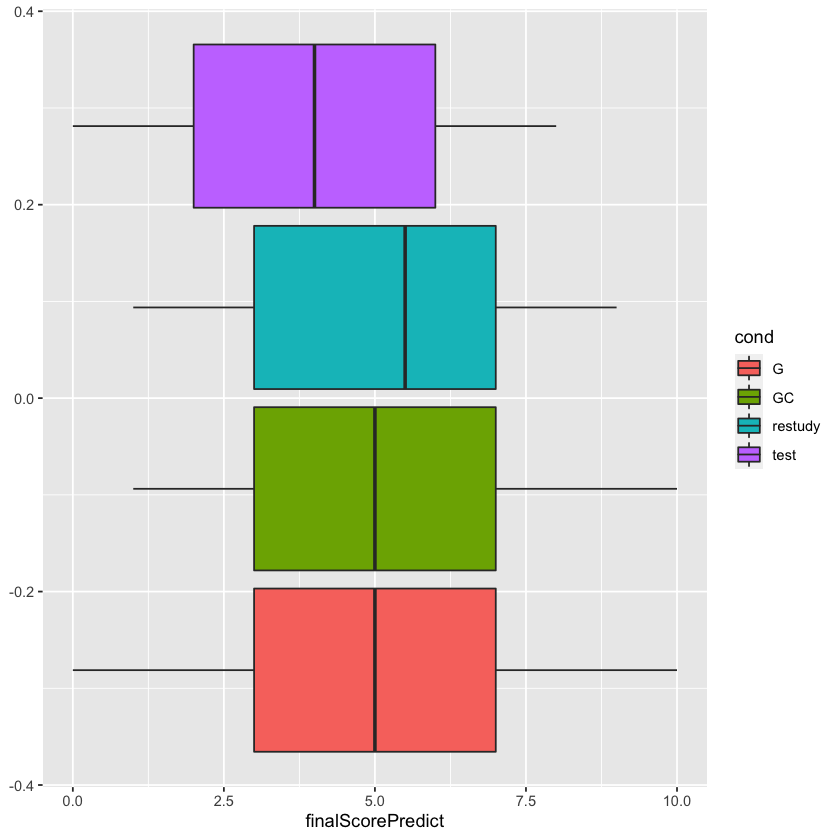


	Welch Two Sample t-test

data:  Gcond$diff_material and GCcond$diff_material
t = -0.043152, df = 37.659, p-value = 0.9658
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.307104  1.252559
sample estimates:
mean of x mean of y 
 6.772727  6.800000 



	Welch Two Sample t-test

data:  Gcond$diff_material and Tcond$diff_material
t = -1.4536, df = 42.336, p-value = 0.1534
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.2071344  0.3586496
sample estimates:
mean of x mean of y 
 6.772727  7.696970 



	Welch Two Sample t-test

data:  Gcond$diff_material and Rcond$diff_material
t = 0.63426, df = 43.124, p-value = 0.5293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9056996  1.7368684
sample estimates:
mean of x mean of y 
 6.772727  6.357143 



	Welch Two Sample t-test

data:  GCcond$diff_material and Tcond$diff_material
t = -1.6806, df = 48.09, p-value = 0.09933
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.9700348  0.1760954
sample estimates:
mean of x mean of y 
  6.80000   7.69697 



	Welch Two Sample t-test

data:  GCcond$diff_material and Rcond$diff_material
t = 0.79555, df = 45.717, p-value = 0.4304
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6778443  1.5635586
sample estimates:
mean of x mean of y 
 6.800000  6.357143 



	Welch Two Sample t-test

data:  Tcond$diff_material and Rcond$diff_material
t = 2.3882, df = 57.439, p-value = 0.02024
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2166018 2.4630519
sample estimates:
mean of x mean of y 
 7.696970  6.357143 


[1] 2.180966

[1] 2.18639

[1] 2.389099

[1] 1.67332


	Welch Two Sample t-test

data:  Gcond$priorTotal and GCcond$priorTotal
t = -0.95035, df = 38.392, p-value = 0.3479
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0241797  0.3696342
sample estimates:
mean of x mean of y 
 1.272727  1.600000 



	Welch Two Sample t-test

data:  Gcond$priorTotal and Tcond$priorTotal
t = -0.45992, df = 39.276, p-value = 0.6481
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8177139  0.5146836
sample estimates:
mean of x mean of y 
 1.272727  1.424242 



	Welch Two Sample t-test

data:  Gcond$priorTotal and Rcond$priorTotal
t = -0.13787, df = 43.551, p-value = 0.891
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7608399  0.6634373
sample estimates:
mean of x mean of y 
 1.272727  1.321429 



	Welch Two Sample t-test

data:  GCcond$priorTotal and Tcond$priorTotal
t = 0.62787, df = 44.074, p-value = 0.5333
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3883703  0.7398855
sample estimates:
mean of x mean of y 
 1.600000  1.424242 



	Welch Two Sample t-test

data:  GCcond$priorTotal and Rcond$priorTotal
t = 0.90563, df = 45.449, p-value = 0.3699
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3407948  0.8979376
sample estimates:
mean of x mean of y 
 1.600000  1.321429 



	Welch Two Sample t-test

data:  Tcond$priorTotal and Rcond$priorTotal
t = 0.35358, df = 54.767, p-value = 0.725
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4799835  0.6856112
sample estimates:
mean of x mean of y 
 1.424242  1.321429 


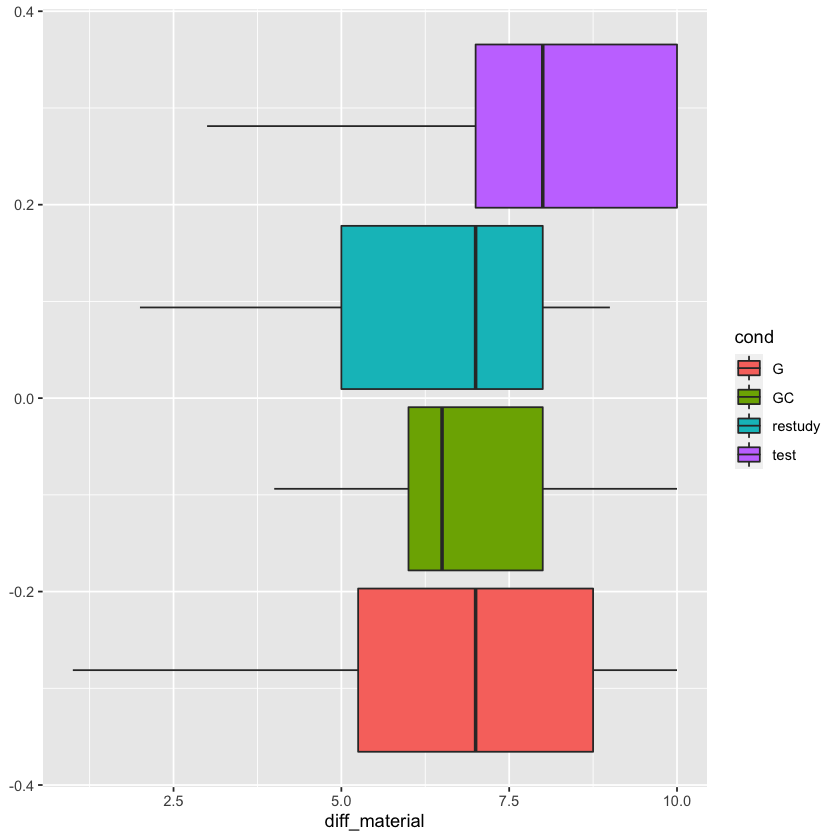

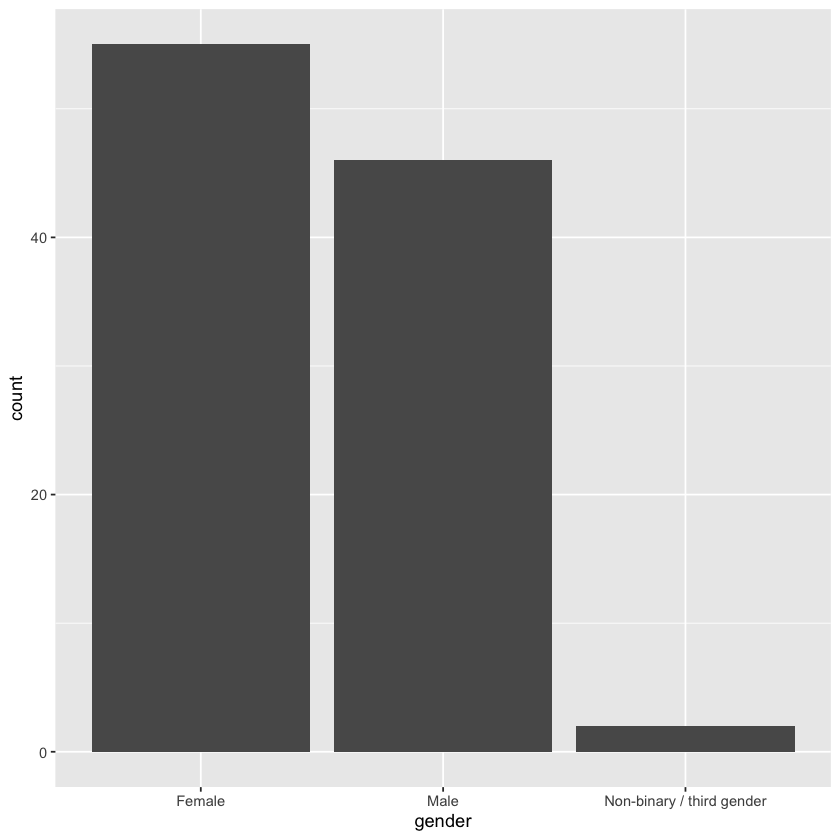

In [6]:
aov.summary <- aov(acc ~ cond, data = clean.df)
summary(aov.summary)

Gcond = clean.df %>% filter(cond == "G")
GCcond = clean.df %>% filter(cond == "GC")
Tcond = clean.df %>% filter(cond == "test")
Rcond = clean.df %>% filter(cond == "restudy")

ggplot(clean.df, aes(x=acc, fill = cond)) + geom_boxplot()
ggplot(clean.df, aes(x=cond, y=acc)) + geom_violin()

# collapse Google
Googlecond = clean.df %>% filter(cond == "G" | cond == "GC")

t.test(Googlecond$acc,Rcond$acc)
t.test(Tcond$acc,Googlecond$acc)
sd(Googlecond$acc)
sd(Rcond$acc)
sd(Tcond$acc)

#collapse except Google
RESTcond = clean.df %>% filter(!(cond == "G"))
t.test(Gcond$acc,RESTcond$acc)
sd(Gcond$acc)
sd(RESTcond$acc)

#collapse T/R and G/GC
Restcond = clean.df %>% filter(!(cond == "G"| cond == "GC"))
t.test(Googlecond$acc,Restcond$acc)
sd(Googlecond$acc)
sd(Restcond$acc)

#collapse except Test
noTcond = clean.df %>% filter(!(cond == "T"))
t.test(Tcond$acc,noTcond$acc)
sd(Tcond$acc)
sd(noTcond$acc)

#t-test assumption checks
library(rstatix)
clean.df %>% group_by(cond) %>% identify_outliers(acc)
clean.df %>% group_by(cond) %>% shapiro_test(acc)
clean.df %>% levene_test(acc ~ cond)

t.test(Gcond$acc,GCcond$acc, var.equal = TRUE)
t.test(Gcond$acc,Tcond$acc, var.equal = TRUE)
t.test(Gcond$acc,Rcond$acc, var.equal = TRUE)
t.test(GCcond$acc,Tcond$acc, var.equal = TRUE)
t.test(GCcond$acc,Rcond$acc, var.equal = TRUE)
t.test(Tcond$acc,Rcond$acc, var.equal = TRUE)

#linear model
lms.fit = lm(acc~cond, data=clean.df)
summary(lms.fit)


lmm.fit = lm(acc~cond+gender+ethnicity+edu+LearningStyle+openBookExam+Gdefault+times_searchEngine+phone+computer+tablet+pt1A+pt2A, data=clean.df)
summary(lmm.fit)

#model selection
library(leaps)
regfit.full = regsubsets(acc~., select(clean.df, c(acc,cond,gender,ethnicity,edu,
                                                   LearningStyle,openBookExam,
                                                   Gdefault,times_searchEngine,phone,computer,tablet,
                                                   pt1A,pt2A)),nvmax=19)
summary(regfit.full)

#Known coding
#"eukaryotes"   6 
#"studebaker"   10 
#"GUM"          15 
#"gymnosperms"  7  
# "thalassemia" 18
#"contrapposto" 20 
#"camelopard"   22 
# "bernoulli’s" 9   
# "hovercraft"  21 
# "ellipsoidal" 23 


#"studebaker",	"bernoulli’s",	"camelopard",	"contrapposto",	"gymnosperms",	"thalassemia",	"GUM",	"hovercraft",	"ellipsoidal",	"eukaryotes"


clean.df %>% count(gender)
clean.df %>% count(ethnicity)

#predicted final score
clean.df %>% group_by(cond) %>% summarize(mn.scorePredict = mean(as.numeric(finalScorePredict)))
clean.df %>% ggplot(aes(x=finalScorePredict,fill=cond)) + geom_boxplot()

t.test(Gcond$finalScorePredict,GCcond$finalScorePredict)
t.test(Gcond$finalScorePredict,Tcond$finalScorePredict)
t.test(Gcond$finalScorePredict,Rcond$finalScorePredict)
t.test(GCcond$finalScorePredict,Tcond$finalScorePredict)
t.test(GCcond$finalScorePredict,Rcond$finalScorePredict)
t.test(Tcond$finalScorePredict,Rcond$finalScorePredict)

sd(Tcond$finalScorePredict)
sd(Rcond$finalScorePredict)
sd(Gcond$finalScorePredict)
sd(GCcond$finalScorePredict)


#difficulty of material rating
clean.df %>% group_by(cond) %>% summarize(mn.difLevel = mean(as.numeric(diff_material)))
clean.df %>% ggplot(aes(x=diff_material,fill=cond)) + geom_boxplot()

t.test(Gcond$diff_material,GCcond$diff_material)
t.test(Gcond$diff_material,Tcond$diff_material)
t.test(Gcond$diff_material,Rcond$diff_material)
t.test(GCcond$diff_material,Tcond$diff_material)
t.test(GCcond$diff_material,Rcond$diff_material)
t.test(Tcond$diff_material,Rcond$diff_material)

sd(Rcond$diff_material)
sd(Tcond$diff_material)
sd(Gcond$diff_material)
sd(GCcond$diff_material)


#check if prior knowledge differ across
t.test(Gcond$priorTotal,GCcond$priorTotal)
t.test(Gcond$priorTotal,Tcond$priorTotal)
t.test(Gcond$priorTotal,Rcond$priorTotal)
t.test(GCcond$priorTotal,Tcond$priorTotal)
t.test(GCcond$priorTotal,Rcond$priorTotal)
t.test(Tcond$priorTotal,Rcond$priorTotal)

ggplot(clean.df, aes(gender)) + geom_bar()

library(boot)
